# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

In [1]:
import pandas as pd 

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


**Q1.** This question provides some practice cleaning variables which have common problems.
1. ~~Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)~~
2. ~~Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?~~
3. ~~Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.~~
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

### Question 1, Part 1 

In [2]:
# !pip install matplotlib

In [3]:
# importing packages that i, in my amateur mind, think might be helpful? 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
# reading in the data 
airbnb_data = pd.read_csv("./data/wrangling/airbnb_hw.csv") 
airbnb_data

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


(array([19710.,  5707.,  1975.,  1276.,   744.,   403.,   317.,   167.,
          117.,    62.]),
 array([  0.,  51., 102., 153., 204., 255., 306., 357., 408., 459., 510.]),
 <BarContainer object of 10 artists>)

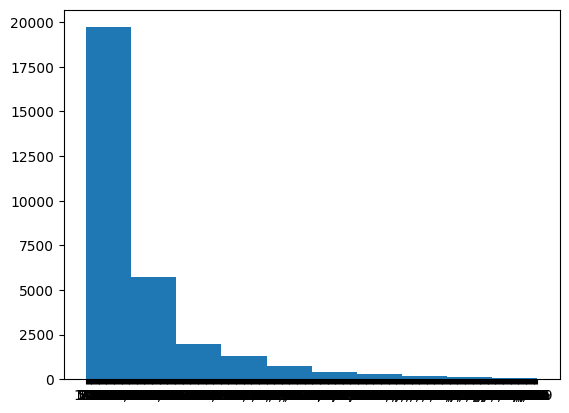

In [5]:
# seeing if there is WEIRD outliers
plt.hist(airbnb_data["Price"])
# ok it seems like they're all being read as strings?
# it's like the lobotomy graph in class

In [6]:
# i want to check if our floats are being registered as strings. 
# let's check the data in our "Price" column. 
airbnb_data["Price"].head() 

0    145
1     37
2     28
3    199
4    549
Name: Price, dtype: object

In [7]:
# is that number being registered as a string? 
print(type(airbnb_data["Price"][0])) 
# it shouldn't be returning strings, so there is something wrong 

<class 'str'>


In [8]:
# we will be assigning the price data to its own variable so we can...
# do stuff with the data without completely messing up the dataframe.
prices = airbnb_data["Price"]
prices

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: object

In [9]:
# time to coerce the strings to NaNs. 
# this is so that all the entries that can be registered as numbers
# are indeed registered as numbers. 
# don't worry, i'll be returning the values that are strings...
# ...to their rightful homes, if they can also be turned into...
# ...numeric values. 

# we will assign this 'coerced' column to this own variable because...
# ...i'd like to use the price column later. 
prices_1 = pd.to_numeric(prices, errors="coerce")
prices_1

0        145.0
1         37.0
2         28.0
3        199.0
4        549.0
         ...  
30473    300.0
30474    125.0
30475     80.0
30476     35.0
30477     80.0
Name: Price, Length: 30478, dtype: float64

In [10]:
# to take a look at the data in our price column that were strings...
# ...we will have to take a look at what values were coerced to NaNs. 
nan_prices_1 = pd.DataFrame(prices_1.isna())
# nan_df_1 <- i don't want to print this all out so i'm just saving it...
# ...as a comment 

# every 'true' in nan_prices_1 was once a value that was coerced to a NaN.
# so we want to create a data structure with only 'true' values so...
# ...we can take a list at all the indices in that data structure.
# the indices were never moved from where they were in the original...
# ...data structure, so the indices will correlate with the indices...
# ...of the strings in the original data structure. 
all_nans_1 = nan_prices_1.where(nan_prices_1.Price == True)
all_nans_1 = all_nans_1.dropna()

# let's view those indices. 
### CHATGPT HELPED ME WITH THIS LINE OF CODE. THIS IS CHATGPT'S DOING ###
nans_idx_1 = all_nans_1.index.tolist()
print(nans_idx_1)

[101, 263, 764, 1272, 1275, 1476, 1846, 1973, 1977, 2095, 2149, 2337, 2405, 2441, 2716, 2912, 3482, 3483, 3994, 4002, 4003, 4335, 4428, 4616, 4755, 4756, 4781, 5088, 5294, 5404, 5407, 5623, 6336, 6467, 6788, 7018, 7118, 7149, 7208, 7368, 7374, 7544, 7550, 7629, 7780, 7853, 8141, 8285, 8507, 8663, 8702, 9253, 9578, 10237, 10600, 11173, 11227, 11394, 11521, 12384, 12579, 12751, 12894, 12981, 13165, 13350, 13475, 13685, 13745, 14500, 14591, 14817, 14999, 15002, 15181, 15205, 15232, 15258, 15386, 15633, 15884, 15930, 15969, 16345, 16675, 16782, 16826, 16843, 16892, 17041, 17105, 17142, 17146, 17261, 17322, 17331, 17335, 17429, 17463, 17466, 17482, 17486, 17511, 17534, 17540, 17562, 17694, 17708, 17710, 17711, 17712, 17729, 17760, 17768, 17783, 17784, 17786, 17799, 17802, 17807, 17827, 17831, 17833, 17851, 17853, 17859, 17862, 17868, 17875, 17885, 17900, 17905, 17911, 17936, 17938, 17940, 17954, 17958, 17979, 17984, 17986, 18026, 18061, 18199, 18855, 18901, 19222, 19372, 19377, 19693, 20388

In [11]:
# let's create a dataframe with just those indices and view...
# ...the values in that dataframe. 
uncleaned_prices_1 = pd.DataFrame(prices[nans_idx_1])
uncleaned_prices_1
# looks like the issue is someone put a comma there. 

,Price
101,"1,990"
263,"1,000"
764,"1,200"
1272,"1,000"
1275,"5,000"
...,...
28951,"3,390"
28952,"1,356"
28953,"2,599"
28985,"2,000"


In [12]:
# getting rid of those commas
# https://saturncloud.io/blog/how-to-remove-characters-from-a-pandas-column-a-data-scientists-guide/
# i am choosing to keep the data that ARE strings because we can easily turn...
# ...them into numbers. 
prices = prices.str.replace(',', '')
prices_2 = pd.to_numeric(prices, errors="coerce")
prices_2

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: int64

In [13]:
# we're gonna check where there were NaNs...
# ...(because that's where there were strings)...
# ...with the same process as last time we checked where strings were. 

# creating a data structure with just NaNs 
nan_prices_2 = pd.DataFrame(prices_2.isna())
all_nans_2 = nan_prices_2.where(nan_prices_2.Price == True)
all_nans_2 = all_nans_2.dropna()

# turning the indices of all the values in that data structure...
# ...into a list 
nans_idx_2 = all_nans_2.index.tolist()
# print(nans_idx_2)
# print(prices_2)

# seeing all parts of the dataframe with indices that correspond with...
# ...entries in the list. 
uncleaned_prices_2 = pd.DataFrame(prices[nans_idx_2])
uncleaned_prices_2
# yippie there's nothing that isn't a number now! 

,Price


(array([2.983e+04, 5.130e+02, 6.400e+01, 2.800e+01, 1.400e+01, 1.000e+01,
        4.000e+00, 4.000e+00, 2.000e+00, 5.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   10. ,   509.5,  1009. ,  1508.5,  2008. ,  2507.5,  3007. ,
         3506.5,  4006. ,  4505.5,  5005. ,  5504.5,  6004. ,  6503.5,
         7003. ,  7502.5,  8002. ,  8501.5,  9001. ,  9500.5, 10000. ]),
 <BarContainer object of 20 artists>)

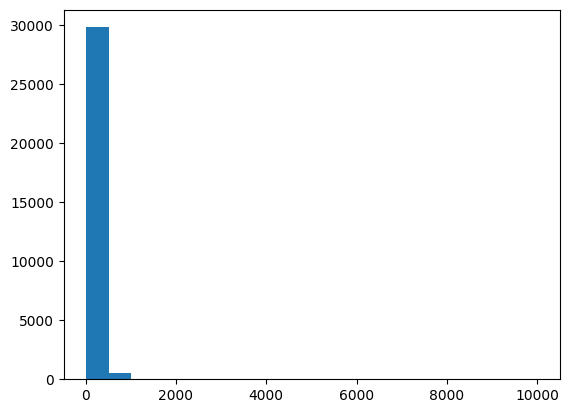

In [14]:
# time to make a chart to see if our data in our column is all numeric 
# yeah seems like prices_2 is all good. 
prices_all_numeric = prices_2
plt.hist(prices_all_numeric, bins=20)
# looks like there are WEIRD freaking outliers 

In [15]:
# what do we even have? 
print(np.min(prices_all_numeric))
print(np.max(prices_all_numeric))

# i guess it's possible to have an airbnb price that's that high? 
# the internet isn't giving me anything on a price cap for an airbnb and though it's absolutely ABSURD...
# ...that one could charge that much, it's not hard to believe that it'd happen. 

# what to do next: maybe see if there are any variables that have EXTREMELY high counts in the data? 
# that way you'd know if they were just there to fill up NaNspace. 

10
10000


In [16]:
# checking the counts of the values in our dataframe. 
prices_all_numeric.value_counts()
# so it's not like there's an absurd amount of 999s.
# if it were the mode of the data, i would be concerned. 

Price
150    1481
100    1207
200    1059
125     889
75      873
       ... 
472       1
454       1
328       1
396       1
291       1
Name: count, Length: 511, dtype: int64

In [17]:
# we're gonna take our cleaned data and attach it to the dataframe...
# ...getting rid of our unclean column. 

# renaming our OLD price column so we know it's old 
airbnb_data = airbnb_data.rename(columns={"Price" : "Price_Old"})
airbnb_data.head(3)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price_Old,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN


In [18]:
# concacenate our cleaned column to the rest of the table
new_airbnb_data = pd.concat([airbnb_data, prices_all_numeric],axis=1)
# drop old column 
new_airbnb_data.drop(columns="Price_Old")
# did that work? 
new_airbnb_data.head(3)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price_Old,Review Scores Rating,Price
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,145
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,37
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,28


In [19]:
# did we successfully put our new numeric column in? 
print(type(new_airbnb_data["Price"][0]))
# yippie!

<class 'numpy.int64'>


In [20]:
# at least i am proud to say there are NO missing values with how i cleaned...
# ...the data!

In [21]:
# i could take this a step further by purging outliers. 
# but i only have limited time to get my work done and...
# ...i think i learned what i needed to learn from this part of the...
# ...assignment. 

### Question 1, Part 2

In [22]:
# let's take a look at our subject_injuries data
police_data = pd.read_csv("./data/wrangling/mn_police_use_of_force.csv") 
subject_injuries = police_data["subject_injury"]

In [23]:
# what unique values can i see? 
unique_inj = subject_injuries.unique()
unique_inj
# seems like we only have inputs of yes, no, and nan. that means our data should be fine, right? 

array([nan, 'No', 'Yes'], dtype=object)

In [24]:
# what proportion of values is missing? 
is_subjectinj_na = subject_injuries.isna()
# ^ i wanna see how many TRUES we have. 
is_subjectinj_na.value_counts()
# oopsie that's a lot. that means we have a lot of data missing bro. 

subject_injury
True     9848
False    3077
Name: count, dtype: int64

In [25]:
# we can calculate that proportion. 
total_length_injury = len(is_subjectinj_na)
print(f"The proportion of values in our subject_injury column that is missing is {9848/total_length_injury}.")
# WOW. that is concerning; that means our injury data is REALLY incomplete
# it also means that we cannot accurately discern whether, or what, uses of...
# ...police force are dangerous. 

The proportion of values in our subject_injury column that is missing is 0.7619342359767892.


In [26]:
# let's cross-tabulate to see whether injury and...
# ...force type are correlated. 
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
pd.crosstab(police_data["subject_injury"], police_data["force_type"]) 

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


In [27]:
# our goal, however, is to see whether there is correlations between...
# ...MISSING injury data and force type. 

# adding a new column to the dataframe that tells us whether or not...
# ...subject injury data for that particular case of police force was...
# ...gathered or not. 
# https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
police_data["is_subj_inj_missing"] = is_subjectinj_na
police_data.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood,is_subj_inj_missing
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East,True
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West,True
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West,True
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West,True
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West,True


In [28]:
# cross-tabulate 'is subject injury missing' data and also 'force type' data. 
pd.crosstab(police_data["is_subj_inj_missing"], police_data["force_type"]) 
# i see......

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
is_subj_inj_missing,,,,,,,,,,,
False,2,2379,172,2,77,74,0,3,0,46,322
True,2,7051,1421,0,27,74,87,0,170,31,985


In [29]:
# from a cursory glance of the data, we have greatest NaN proportions for:
    # 'Less Lethal' (not sure what this means, internet says taser/baton/etc)
    # Chemical Irritant
    # Maximal Restraint Technique
# the categories with the smallest proportions of NaNs...
# ...(the categories that have more than 10 values, that is)...
# ...are:
    # K9 bite
    # improvised weapon 
    # gun point display 

# seems like they tend to be techniques that are harmful but not life...
# ...threatening in what i assume are most cases. i remember discussing in...
# ...class that it was possible that they only register injuries that...
# ...lead to hospitalisation and i would be inclined to agree. 
# the injuries are likely there but there isn't a written record of them. 

### Question 1, Part 3

In [30]:
# reading in our data (takes a second)
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
justice_data = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
justice_data

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22981,SJA00343,22839,M,B,1976,41,4,41,2,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22982,SJA00344,,F,W,,,9,,99,99,...,,,,999,999,,3,,9,Defendant could not be classified or tracked d...
22983,SJA00345,22841,M,B,1981,36,4,36,1,1,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...
22984,SJA00346,22842,F,B,1993,24,2,24,5,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [31]:
# what values are in our pretrial release status data?
# (we assign the column from our dataframe to its own variable so... 
# ...we can explore.) 
pretrial_release_status = justice_data["WhetherDefendantWasReleasedPretrial"]
pretrial_release_status

0        9
1        0
2        0
3        0
4        1
        ..
22981    1
22982    1
22983    1
22984    1
22985    1
Name: WhetherDefendantWasReleasedPretrial, Length: 22986, dtype: int64

In [32]:
# what are the different kinds of values in 'pretrial release status'?
pretrial_release_status.unique()
# who was lobotomised enough to replace NaNs with '9'?!

array([9, 0, 1])

In [33]:
# looking at value counts
pretrial_release_status.value_counts()
# we got a couple of NaNs. the rest seem to be booleans. 
# 1 = TRUE (released), 0 = FALSE (not released)

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64

In [34]:
# we assume '9' is a stand in for 'nan', and even if we didn't...
# ...we'd still put an NaN there because we don't know what 9 even means. 
pretrial_release_status = pretrial_release_status.replace(9, np.nan)
pretrial_release_status

0        NaN
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
22981    1.0
22982    1.0
22983    1.0
22984    1.0
22985    1.0
Name: WhetherDefendantWasReleasedPretrial, Length: 22986, dtype: float64

In [35]:
# did that work
pretrial_release_status.value_counts()

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64

In [36]:
# replacing our old column. let's rename the old column so we know it's old
justice_data = justice_data.rename(columns={"WhetherDefendantWasReleasedPretrial" : "pretrial_old"})
# checking to see if the renaming process was successful
justice_data["pretrial_old"].head(3)

0    9
1    0
2    0
Name: pretrial_old, dtype: int64

In [37]:
# concacenate our cleaned column to the rest of the table
new_justice_data = pd.concat([justice_data, pretrial_release_status],axis=1)
# drop old column 
new_justice_data.drop(columns="pretrial_old")
# did that work? 
# (new_justice_data.head(3) should suffice for us to view because one of...
# ...the first values of our dataframe was a 9.) 
new_justice_data.head(3)

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants,WhetherDefendantWasReleasedPretrial
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,999,999,,4,1,0,Defendant could not be classified or tracked d...,NaN
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...,0.0
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...,0.0


In [38]:
# seeing if that concatenation was successful
new_justice_data["WhetherDefendantWasReleasedPretrial"].head(3)
# yippie!
# optional would be renaming that column but, we are running out of time. 

0    NaN
1    0.0
2    0.0
Name: WhetherDefendantWasReleasedPretrial, dtype: float64

### Question 1, Part 4

In [48]:
# surveying our imposed sentence data
justice_data["ImposedSentenceAllChargeInContactEvent"].head() 


0                    
1                  60
2                  12
3    .985626283367556
4                    
Name: ImposedSentenceAllChargeInContactEvent, dtype: object

In [49]:
# i was told to look at this variable so...
justice_data["SentenceTypeAllChargesAtConvictionInContactEvent"].value_counts()
# what do each of these numbers mean? is there a key to find out? 

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64

In [41]:
# cross-tabulate the variables given in our hint so we can see if there's...
# ...any correlations between values of the different variables, or...
# ...unclean data for one variable corresponding to certain values in...
# ...another piece of data
pd.crosstab(justice_data["SentenceTypeAllChargesAtConvictionInContactEvent"], justice_data["ImposedSentenceAllChargeInContactEvent"])
# seems like we have NaNs EXCLUSIVELY where the 'imposed...
# ...sentence' variable is left blank. 

# those NaNs seem to be represented by both '4' and '9'! 
# because i don't see any 4s and 9s for values that aren't blank. 

# there are also not a significant amount of random 99s so i assume 99...
# ...was not used as a placeholder number. 

ImposedSentenceAllChargeInContactEvent,,.0328542094455852,.0657084188911704,.0985626283367557,.131416837782341,.164271047227926,.197125256673511,.262833675564682,.328542094455852,.394250513347023,...,94.1642710472279,95,96,96.0328542094456,960,98,98.95687885,99,99.3285420944559,99.4928131416838
SentenceTypeAllChargesAtConvictionInContactEvent,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,2,4,26,0,0,276,0,...,0,0,7,0,0,0,0,0,0,0
1,0,6,21,6,10,33,6,3,337,3,...,1,0,11,1,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,21,0,1,1,1,0,0,0
4,8779,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,274,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# how many blanks we got?
imposed_sentence.value_counts()
# that's a lot of blanks 

ImposedSentenceAllChargeInContactEvent
                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
11.9055441478439       1
35.0061601642711       1
46.6242299794661       1
81.0225872689938       1
202                    1
Name: count, Length: 484, dtype: int64

In [53]:
# i want to see the indexes of where we got those 4s and 9s...
# ...because those are values we know for a FACT we should get rid of. 
# to do this we first put just the 4s and 9s in its own separate data structure.
charge_type_col = justice_data["SentenceTypeAllChargesAtConvictionInContactEvent"]
charge_is_nan = charge_type_col.where(charge_type_col > 2)
charge_is_nan

0        9.0
1        NaN
2        NaN
3        NaN
4        4.0
        ... 
22981    4.0
22982    9.0
22983    4.0
22984    4.0
22985    4.0
Name: SentenceTypeAllChargesAtConvictionInContactEvent, Length: 22986, dtype: float64

In [67]:
# we can put the indices of all values where charges... 
# ...were 4 or 9 into a list.
# we have to drop the spots were NOT 4 or 9 before we can do this. 
charges_is_nan_1 = charge_is_nan.dropna()
# now we create our list 
charges_is_nan_idxs = charges_is_nan_1.index.to_list()
charges_is_nan_idxs[:10] # checking to see if it worked
# seems to have worked 

[0, 4, 11, 12, 15, 16, 18, 21, 22, 24]

In [69]:
# given that those are our NaNs, we're gonna see what is seen...
# ...at those indices in the 'imposed sentence' column. 

# let's create a dataframe with just those indices and view...
# ...the values in that dataframe. 
uncleaned_sentences_1 = pd.DataFrame(imposed_sentence[charges_is_nan_idxs])
uncleaned_sentences_1
# as expected

,ImposedSentenceAllChargeInContactEvent
0,
4,
11,
12,
15,
...,...
22981,
22982,
22983,
22984,


In [70]:
# let's double check to see what values we have
uncleaned_sentences_1.value_counts()

ImposedSentenceAllChargeInContactEvent
                                          9053
Name: count, dtype: int64

In [88]:
# we will purge all string the values in our dataframe with the indices...
# ...where we have NaNs.
# (i'm putting a 99999999 there as a placeholder at first because...
# ...i have other code i want to run later where i want to see where...
# ...i create NaNs as a result of coercion.)
# (...i will change it to an NaN later)
justice_data.loc[charges_is_nan_idxs,"ImposedSentenceAllChargeInContactEvent"] = 99999999
# let's see if that worked.
justice_data["ImposedSentenceAllChargeInContactEvent"]
# seems so! 

0                99999999
1                      60
2                      12
3        .985626283367556
4                99999999
               ...       
22981            99999999
22982            99999999
22983            99999999
22984            99999999
22985            99999999
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: object

In [100]:
# let's see if we can coerce all of our remaining values as...
# ...numeric values now. 
justice_data["ImposedSentenceAllChargeInContactEvent"] = pd.to_numeric(justice_data["ImposedSentenceAllChargeInContactEvent"], errors="coerce")
# where do we have NaNs as a result of coercion? that will help us know...
# ...whether we have string-like values beyond the spaces that were put as...
# ...placeholders at our locations for the missing values in the sentence type...
# ...column. 

# first, create a data structure where we have 'true' or 'false' depending on...
# ...whether we have an NaN at that index of the dataframe for imposed sentence...
# ...data. 
where_nans_cleaned_data = justice_data["ImposedSentenceAllChargeInContactEvent"].isna()
# where is 'is na' == True? 
where_nans_cleaned_data = where_nans_cleaned_data.where(where_nans_cleaned_data == True)
# dropping parts where where_nans_cleaned_data == False
where_nans_cleaned_data = where_nans_cleaned_data.dropna()
# viewing where_nans_cleaned_data
where_nans_cleaned_data = pd.DataFrame(where_nans_cleaned_data)
where_nans_cleaned_data
# there is nothing yay! 

# that means that the only string-like values in our original imposed...
# ...sentences column were those spaces that we cleaned up at first. 

,ImposedSentenceAllChargeInContactEvent


In [101]:
# we will now change those 99999999 placeholder values...
# ...back to NaNs 
justice_data.loc[charges_is_nan_idxs,"ImposedSentenceAllChargeInContactEvent"] = np.nan
justice_data["ImposedSentenceAllChargeInContactEvent"]
# there we go 

0              NaN
1        60.000000
2        12.000000
3         0.985626
4              NaN
           ...    
22981          NaN
22982          NaN
22983          NaN
22984          NaN
22985          NaN
Name: ImposedSentenceAllChargeInContactEvent, Length: 22986, dtype: float64

In [ ]:
# we could go further with the data cleaning by purging outliers but...
# ...i have only so much time, and much work to do :) 

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. ~~Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.~~
2. ~~Drop any columns that do not contain data.~~
3. ~~Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?~~
4. ~~Clean the Age variable and make a histogram of the ages of the victims.~~
5. ~~What proportion of victims are male?~~
6. ~~Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?~~
~~7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.~~
8. ~~Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?~~
9. ~~What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)~~

### Question 2, Part 1

In [ ]:
!pip install xlrd

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
shark_data = pd.read_excel("./data/wrangling/GSAF5.xls") 
shark_data.head()

### Question 2, Part 2

In [ ]:
# 'get rid of any columns that don't contain data' 
# this line of code is from GOOGLE'S STUPID CLANKER
empty_cols = [col for col in shark_data.columns if shark_data[col].isnull().all()]
empty_cols

# we have no truly empty columns it seems? 
# a few useless ones but that's different than them being empty. 

# when i asked in class, the professor said that there were hundreds of 
# empty columns so i guess those weren't even imported. 

### Question 2, Part 3

In [ ]:
# let's see the kinds of years we have in the data 
shark_data['Year'].value_counts()
# what do you MEAN year zero or year five
# i see a WIDE range of values. like, years you could actually get data for...
# ...and also stuff that is probably written on freaking CUNEIFORM tablets 
# year ZERO???????

In [ ]:
# check if all the values are numeric 
print(type(shark_data['Year'][0]))
# huzzah they are numbers! 

In [ ]:
# let's try to plot it to verify they're all numbers (again) 
plt.hist(shark_data['Year'])
# yep
# now we just get rid of numbers that are of no use to us

In [ ]:
# filtering shark data to be only years 1940 or after. 
shark_data['Year'] = shark_data['Year'].where(shark_data['Year'] >= 1940)

In [ ]:
# plotting our final histogram 
plt.hist(shark_data['Year'], bins=30, color="#33aaee")

# setting x and y axes
plt.xlabel("Year")
plt.ylabel("Number of attacks") 

# title 
plt.title("Shark attacks appear to increase as years pass", loc="left")

# despining our graph after torturing the data til it screams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
# ^ these are universal parameters! 

plt.show()

# seems to be an increase but i don't know if i would...
# ...attribute that to a greater number of shark attacks as much as...
# ...better data collection methods that allow us to register more shark attacks. 

### Question 2, Part 4

In [ ]:
# taking a look at all of our non-NaN values of the age column...
# ...so we can focus on cleaning those. 
all_age_entries = shark_data['Age'].dropna()
all_age_entries
# '13 or 14' are you SERIOUS 

In [ ]:
# coercing all non-NaN ages to numbers. 
# putting the resulting data structure into a separate data structure. 
# later, we will check the NaNs in THIS data structure... 
# ...and see where they are to see where all the values that could... 
# ...NOT be coerced to NaNs are.
coerced_atk_age = pd.to_numeric(all_age_entries, errors="coerce")
coerced_atk_age.head(3)

In [ ]:
# created a dataframe that shows whether or not...
# ...'coerced_atk_age' is an NaN at a given index. 
# The indices at which we have Trues are the indices...
# ...at which the values could not be coerced. 
is_it_nan_ages = pd.DataFrame(coerced_atk_age.isna())
is_it_nan_ages.head()

In [ ]:
# we're gonna create a data structure that includes ONLY 
# the indices of where there are NaNs, and the value "True".  
it_is_nan_ages = is_it_nan_ages.where(is_it_nan_ages.Age == True)
it_is_nan_ages = it_is_nan_ages.dropna()
# help is from: https://www.geeksforgeeks.org/search-a-pandas-column-for-a-value/

# ...we can turn the indices into a list. 
# this will tell us the indices of non-coercable values in shark["Age"]. 

### CHATGPT HELPED ME WITH THIS LINE OF CODE. THIS IS CHATGPT'S DOING ###
## well actually it helped me with it on a prior problem but i'm re-appropriating it ## 
nans_ages_idx_list = it_is_nan_ages.index.tolist()
print(nans_ages_idx_list)

In [ ]:
# creating a dataframe to view those non-coercable values...
uncleaned_ages_1 = pd.DataFrame(all_age_entries[nans_ages_idx_list])
uncleaned_ages_1
# seems like i want to purge any question marks and turn them into NaNs, turn "half" values into floats...
# ...also eliminate any "or" values or "Teen" or what have you. basically values that are vague. 

In [ ]:
# it's worth exploring if we can see patterns in these messy pieces of data. 
uncleaned_ages_1.value_counts()
# 'A MINOR' WHAT DO YOU M E A N 

In [ ]:
# gotta lowercase ones that are like 'teen' because i'm sure that there...
# ...are upper AND lowercase values like that!
# https://www.geeksforgeeks.org/how-to-lowercase-column-names-in-pandas-dataframe/
uncleaned_ages_1['Age'] = uncleaned_ages_1['Age'].str.lower()
# we want to take a look at the stuff we're trying to clean 
uncleaned_ages_1.value_counts()

In [ ]:
# bruh 
# guess our work isn't finished
MORE_VALUES_TO_PURGE = uncleaned_ages_1['Age'].to_list()
# no real data scientist would do what i'm about to do below. manual viewing of data!
MORE_VALUES_TO_PURGE[1:10]

In [ ]:
# the suffering ends here. 
# i decided that i give up
# im just gonna like, keep the coerced data lol 

# only decided to keep all the useless work i did 
# to demonstrate that i was indeed willing to suffer that much 

shark_data["Age"] = pd.to_numeric(shark_data["Age"], errors="coerce")

In [ ]:
# creating our histogram 
plt.hist(shark_data['Age'], bins=20, color="#55aaee")

# axis labels and titles! 
plt.xlabel("Age in years")
plt.ylabel("Quantity of victims") 
plt.title("Shark attack victims tend to be closer to their 20s", loc="left")

# the despining parameter we've set earlier is universal so lucky us!

In [ ]:
# all the torment that i went through would be helpful if i wished to, say:
    # turn the rows with multiple age values in them into multiple rows 
        # (each row representing one victim of the same attack)
    # turn values like '2 1/2' to values like '2.5'
        # so that they are readable by the machine as numbers. 
        # this will make our values in our age column numeric but not all integers. 
    # removed the '!' before some numbers because what were those even doing there

# but i was given the ok to just coerce everything to a number or an NaN, so... 
# ...i'm not wasting my time. 

### Question 2, Part 5

In [ ]:
# we're gonna observe what's in this column. 
shark_data["Sex"].value_counts()

In [ ]:
# we're gonna append a duplicate row for the second male victim in 
# the M x 2 row. 
# we're gonna get rid of the "x 2" later but we want to ensure the... 
# ...Other Guy is counted. 
that_one_guy = shark_data.loc[3628].copy()
# ^ managed to remember what the index was from when...
# i first attempted to replicate the row. 
# (this data cleaning endeavour is an iterative process) 

# in accordance with the advice of chatgpt, turning that_one_guy into a dataframe 
that_one_guy = pd.DataFrame([that_one_guy])

# concacenating that dataframe to our master dataframe as a new row
shark_data = pd.concat([shark_data, that_one_guy], ignore_index=True)

In [ ]:
# cool, i've successfully added that row.
# let's double check. 
shark_data["Sex"].value_counts()

In [ ]:
# cleaning unnecessary values
# spaces need to be purged. 
# that way "M " can just be "M" and counted with other "M"s
shark_data["Sex"] = shark_data["Sex"].str.replace(' ', '')
shark_data["Sex"].value_counts()

In [ ]:
# ., N, and lli were not sexes the last time i checked
# let's get rid of those 
shark_data["Sex"] = shark_data["Sex"].replace(["N", "lli", "."], np.nan)
shark_data["Sex"].value_counts()

In [ ]:
# i'm just gonna take off the x2 on the Mx2. 
# since now i have data for both of the dudes in that row!  
shark_data["Sex"] = shark_data["Sex"].str.replace('x2', '')

In [ ]:
# did this work
shark_data["Sex"].value_counts()

In [ ]:
# YEAHHHHH
# let's see how stupid men are now
print(f"{(5618/len(shark_data))*100}% of shark attack victims are male.")

### Question 2, Part 6

In [ ]:
# here we go again 
# looking at value counts of type 
shark_data["Type"].value_counts()
# 'sea disaster' this fills me with the primordial rage of captain ahab 
# (i havent read moby dick) 

In [ ]:
# stuff like 'uncomfirmed', 'unverified', etc. is unknown. 
# i have NO IDEA what was meant by stuff like 'questionable' or 'invalid', so i presume those are lost to history.
# therefore they're unknowns as well. 
# also we don't know if the boat attacks etc. were provoked
replaceables = ["Unconfirmed", "?", "Unverified", "Under investigation", "Questionable", "Invalid", "Boat", "Sea Disaster", "Watercraft"]
# https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/
# https://saturncloud.io/blog/how-to-replace-column-values-in-a-pandas-dataframe/
# https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
shark_data["Type"] = shark_data["Type"].replace(replaceables, value='Unknown')

In [ ]:
# what do we have left? 
shark_data["Type"].value_counts()

In [ ]:
# getting rid of ' provoked' extra space 
shark_data["Type"] = shark_data["Type"].str.replace(" ", "")
# let's see what we got
shark_data["Type"].value_counts()

In [ ]:
# proportion of unprovoked attacks 
5153/(len(shark_data["Type"]))
# the majority are known to be unprovoked. 

### Question 2, Part 7

In [ ]:
# well well well what have we got here
# (checking our data)
shark_data['Fatal Y/N'].head()

In [ ]:
# let's see what values we have. 
shark_data['Fatal Y/N'].value_counts()

In [ ]:
# seems like we have issues with 1) capitalisation, and 2) spaces. 
shark_data['Fatal Y/N'] = shark_data['Fatal Y/N'].str.upper()
shark_data['Fatal Y/N'] = shark_data['Fatal Y/N'].str.replace(" ", "")
shark_data['Fatal Y/N'].value_counts()

In [ ]:
# now we replace our unknown values with NaNs
replaceables = ["UNKNOWN", "M", "NQ", "F"]
shark_data['Fatal Y/N'] = shark_data['Fatal Y/N'].replace(replaceables, value=np.nan)
shark_data['Fatal Y/N'].value_counts()

In [ ]:
# we gotta see what we wanna do with that Yx2 guy 
y_little_guy = shark_data['Fatal Y/N'].where(shark_data['Fatal Y/N'] == "YX2")
y_little_guy = y_little_guy.dropna()
y_little_guy
# index to correspond to the row with the two male victims. 
# so we can just, clean out the x2 like we did with the two male victims 

In [ ]:
shark_data['Fatal Y/N']= shark_data['Fatal Y/N'].str.replace('X2', '')
shark_data['Fatal Y/N'].value_counts()

In [ ]:
# we want our NaNs to be 'unknown'
shark_data['Fatal Y/N'] = shark_data['Fatal Y/N'].replace(np.nan, "Unknown")
shark_data['Fatal Y/N'].value_counts()
# yay

### Question 2, Part 8

Are men or women more likely to be attacked unprovoked? 

In [ ]:
# to answer this question, we'd need to cross tabulate...
# ...sex with attack type
pd.crosstab(shark_data["Type"], shark_data["Sex"])

In [ ]:
# nice, now we can look at the probability you are...
# ...attacked unprovoked given that you are a man...
# ...and also the probability that you are attacked unprovoked...
# ...given that you are a woman.
p_m_unprovoked = 4313/(4314+548)
p_f_unprovoked = 670/(670+31)
print(f"The probability you will be attacked unprovoked if you are a man is {p_m_unprovoked}.")
print(f"The probability you will be attacked unprovoked if you are a woman is {p_f_unprovoked}.")

In [ ]:
# seems more likely that you will be attacked unprovoked if you are a woman. 
# i made the decision to purge unknowns because they just like...
# ...all they do is mess up our data. we can only act on what we know.

Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?

In [ ]:
# i guess we're going cross-tabulating (again) now
# cross tabulating with attack type and fatality 
pd.crosstab(shark_data["Type"], shark_data["Fatal Y/N"])

In [ ]:
# nice, now we can look at the probability you are...
# ...dead unprovoked given that you were attacked unprovoked...
# ...and also the probability that you are dead if attacked provoked.

p_fatal_unprovoked = 1252/(21+1252)
p_fatal_provoked = (1252)/(3823+1252)
print(f"The probability you will be killed if attacked provoked is {p_m_unprovoked}.")
print(f"The probability you will be killed if attacked unprovoked is {p_f_unprovoked}.")

In [ ]:
# you are more likely to be killed if the attack is unprovoked. 

Is it more or less likely to be fatal when the victim is male or female?

In [ ]:
# you know the drill
# crosstab
pd.crosstab(shark_data["Sex"], shark_data["Fatal Y/N"])

In [ ]:
# p(fatal | male) vs. p(fatal | female)
p_m_dead = 1242/(1242+3917)
p_f_dead = 120/(602+120)
print(f"The probability you will die of the attack if you are a man is {p_m_dead}.")
print(f"The probability you will die of the attack if you are a woman is {p_f_dead}.")

In [ ]:
# shark attacks seem more fatal for men than they do for women

How do you feel about sharks? 

In [ ]:
# i actually like sharks a lot, and i think the best course of action...
# ...is to be cognizant about the danger that they may pose. 
# they are likely more afraid of you than you are of them and they...
# ...cannot help but act in self defence. 

### Question 2, Part 9

9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [ ]:
# IT'S NOT LETTING ME VIEW THE FREAKING SPECIES COLUMN
# you know what that means
shark_data.columns
# yep. what's new. there's a space

In [ ]:
# yep. now we can feel content to use this column 
# let's lowercase everything before we split. 
shark_species_lower = shark_data["Species "].str.lower()
shark_species_lower.head()

In [ ]:
# time to split the strings into a list!
shark_species_split = shark_species_lower.str.split()
shark_species_split.head()

In [ ]:
# finding item in list for a list of lists. 
# https://www.geeksforgeeks.org/python-check-if-element-exists-in-list-of-lists/
# i'm running out of time so i had to resort to chatgpt for this code chunk
# i'm not gonna lie, the answer was really intuitive so idk why i did that
target = "white"
white_sharks = []
for sublist in shark_species_split:
    if isinstance(sublist, list) and target in sublist:
        white_sharks.append(sublist)
# let's see the length of our list  
white_sharks = len(white_sharks)
print(white_sharks)

In [ ]:
# let's look at the proportion of sharks that are white sharks 
shark_no_na = shark_data["Species "].dropna()
all_sharks = len(shark_no_na)
print(f"the proportion of shark attacks that come from white sharks is {white_sharks/all_sharks}")

In [ ]:
# i could take this a step further by using regex to find...
# ...any words that resemble or include 'white'...
# ...but i only have so much time to do my work :) 

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

In [ ]:
# put your code here. 

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. ~~How did the most recent US Census gather data on race?~~
2. ~~Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?~~
3. ~~Please provide a constructive criticism of how the Census was conducted: What was done well?~~ ~~What do you think was missing?~~ ~~How should future large scale surveys be adjusted to best reflect the diversity of the population?~~ ~~Could some of the Census' good practices be adopted more widely to gather richer and more useful data?~~
4. ~~How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.~~
5. ~~When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race?~~ ~~What challenges can you imagine arising when there are missing values?~~ ~~What good or bad practices might people adopt, and why?~~
6. ~~Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?~~

In [ ]:
# below my answers are written in markdown format!
# for greater readability than code comments! 

# resources: 'how is data collected?'
    # https://www.census.gov/programs-surveys/gov-finances/technical-documentation/methodology/how-the-data-are-collected.html


1. According to the Census Bureau, race data is collected based off of self-identification. (https://www.census.gov/topics/population/race.html)
2. Census data is collected for many reasons: redistricting (drawing electoral districts based on where groups of people live so that they may be represented), to know how to better fund communities, to determine the number of Representatives that should serve each state, and uh...to inform..."business decisions"? Accurate census data seems to be necessary for America's democracy to function as intended; the drawing of districts allows people of minority perspectives to have their opinions represented, and that cannot be done properly without accurate ("quality") knowledge of where, or how many, people of minority groups exist. (https://www.census.gov/programs-surveys/decennial-census/about/why.html)
3. I appreciate the clarifying notes on some of the questions: vague race definitions such as 'black', 'white', and 'Asian' are unclear, and I know that different cultures will divide race lines differently (an international student once told me they thought I was Turkmen - who they considered white). However, because the Census is conducted as a survey, its insights will always be subject to survey bias: one may be motivated to conceal information out of worry or desire for privacy (their answers are confidential, but you never know what may happen), or their definition of a given demographic category may differ from another person's. In this case, survey bias is unavoidable, as it feels unethical (and also not terribly cautious) to collect a person's data on their behalf. I'm also inclined to point out that people from Southwest Asia and North Africa don't get a box on the census; they are classed as white, even though Americans in general racialize them (*especially* if they are Muslim). Any future large-scale surveys pertaining to race must reflect how people of a given heritage are treated or racialised in practise; 'race' is not a category grounded in biology, anyways. The Census can and should continue to add clarifying notes to its questions, too (I struggle with understanding what surveys ask sometimes). 
4. The Census collected data about sex demographics with a survey question that asked participants to tick the box corresponding to their sex. The question forces a person to choose between male and female, which does not accomodate for intersex people. Additionally, a person's sex assigned at birth might not give the best perspective on how they are actually treated; transphobia, in addition to misogyny that some trans women experience, are not accounted for in this part of the Census. I also saw that the Census did not ask any questions on gender identity (which is different than sex), which is also ridiculously important to account for when thinking of how to combat discrimination against gender minorities. 
5. **a)** Sensitive information is sensitive information - if I'm a data scientist looking at census data, I'm looking at the names *and* all the demographic characteristics of *several* people, even information that they may keep secret in person. What if Mona depends on passing as white to avoid discrimination in the workplace? What if Derek passes fully as male and hides his transness, but has 'female' listed as his sex? Even if our data scientist the world's most bigoted person, they cannot realistically do anything to the individuals, but it still feels invasive and disrespectful to view so much deeply personal information. **b)** Missing values about protected characteristics may be difficult to deal with because of how important census data actually *is* - as stated in question 2's answer, American democracy necessitates that we know where, or how many, people of different demographic groups live. When coming across NaNs, we might feel inclined to predict what values they may correspond to, and we risk being wrong - but if we decide to leave our missing values, we might neglect the needs of sigificant groups of people. **c)** As someone who is not qualified to clean census data, I can't say what practises are *good* when it comes to dealing with missing values. However, I know enough about data science and politics to understand what practises might be *bad:* one poorly-equipped data scientist might manually input information about race or gender or sexuality based on assumptions from other pieces of demographic information (though you'd have to be insane to willingly do this for the whole census); another may simply delete any rows with NaNs (which would deprive us of plenty of important information!). 
6. Algorithms are often ridiculously bad at predicting information because they are so horribly subject to bias that they have no way of seeing through. If our data on a given demographic is incomplete or biased, and we use an algorithm to make guesses about certain characteristics, then the new information generated would reflect the bias in the data more than it would reflect any truth about the population. Also, if we have data generated by an algorithm, and we feed it back into the algorithm, our algorithm will likely make increasingly inaccurate predictions, as it's fed with fake information.  